# sequana_coverage test case example (fungus) 

This notebook creates the BED file S_pombe.filtered.bed provided in 
- https://github.com/sequana/resources/tree/master/coverage and
- https://www.synapse.org/#!Synapse:syn10638358/wiki/465309

genome length: 5.5Mb
It also shows the ability of sequana_coverage tool to handle multi-chromosome input data sets

**WARNING**: To create the input BED file, you will need an account on synapse to get the FastQ files.

You can skip the steps that build the BED file and download it directly from github:

```
wget //github.com/sequana/resources/raw/master/coverage/S_pombe.filtered.bed.bz2
bunzip2 S_Pombe.filtered.bed
```

and jump to the **Sequana_coverage analysis (using the library)** section directly.

Otherwise, we first download 2 FastQ files from Synapse, its reference genome and its genbank annotation. Then, we use   BWA to map reads into a BAM file. The BAM file itself is converted to a BED, which is going to be one input file to our analysis. Finally, we use the coverage tool from Sequana project (i) with the standalone (sequana_coverage) and (ii) the Python library to analyse the BED file.

Versions used:
- sequana 0.7.0
- bwa mem 0.7.15
- bedtools 2.26.0
- samtools 1.5
- synapseclient 1.7.2

In [15]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = [10,7]

Populating the interactive namespace from numpy and matplotlib


# Download FastQ files (1.6Gb)

In [2]:
import synapseclient
l = synapseclient.login()
l.get("syn10641621", downloadLocation=".", ifcollision="overwrite.local")
l.get("syn10641896", downloadLocation=".", ifcollision="overwrite.local")

Welcome, Thomas Cokelaer!



File(modifiedBy='375805', uri='/repo/v1/entity/syn10641896', path='/home/cokelaer/Work/github/sequana_resources/coverage/fungus/M14-19_J29_01_TAAGGCGA-TATCCTCT_L002_R2_001.fastq.gz', concreteType='org.sagebionetworks.repo.model.FileEntity', createdBy='375805', versionLabel='1', accessControlList='/repo/v1/entity/syn10641896/acl', name='M14-19_J29_01_TAAGGCGA-TATCCTCT_L002_R2_001.fastq.gz', versions='/repo/v1/entity/syn10641896/version', etag='9358c658-54ab-41d9-b93f-49e8b7b20888', cacheDir='/home/cokelaer/Work/github/sequana_resources/coverage/fungus', entityType='org.sagebionetworks.repo.model.FileEntity', files=['M14-19_J29_01_TAAGGCGA-TATCCTCT_L002_R2_001.fastq.gz'], annotations='/repo/v1/entity/syn10641896/annotations', id='syn10641896', versionNumber=1, versionUrl='/repo/v1/entity/syn10641896/version/1', dataFileHandleId='17867278', modifiedOn='2017-09-07T20:10:34.962Z', synapseStore=True, _file_handle={'contentSize': 814044782, 'fileName': 'M14-19_J29_01_TAAGGCGA-TATCCTCT_L002_R2

## Download reference and annotation files

In [3]:
!sequana_coverage --download-reference CU329670 
!sequana_coverage --download-reference CU329671
!sequana_coverage --download-reference CU329672 
!sequana_coverage --download-reference X54421 

INFO    [sequana]:  Downloading reference CU329670 from ENA

INFO    [sequana]:  Downloading reference CU329671 from ENA

INFO    [sequana]:  Downloading reference CU329672 from ENA

INFO    [sequana]:  Downloading reference X54421 from ENA



In [4]:
!sequana_coverage --download-genbank CU329670
!sequana_coverage --download-genbank CU329671
!sequana_coverage --download-genbank CU329672
!sequana_coverage --download-genbank X54421

INFO    [sequana]:  Downloading genbank CU329670 from ENA

INFO    [sequana]:  Downloading genbank CU329671 from ENA

INFO    [sequana]:  Downloading genbank CU329672 from ENA

INFO    [sequana]:  Downloading genbank X54421 from ENA



In [5]:
!cat CU*gbk  X*gbk > S_pombe.gbk
!cat CU*.fa X*.fa> S_pombe.fa

The Reference must be altered to rename the header so that they 
agree with the genbank 

In [12]:
files = ['CU329670.fa', "CU329671.fa", "CU329672.fa", "X54421.fa"]
with open("S_pombe.fa", "w") as fout:
    for filename in files:
        with open(filename, "r") as fin  :
            for line in fin.readlines():
                if line.startswith(">"):
                    start, end = line.split(None, 1)
                    accession = start[1:].rsplit("|", 1)[1]
                    line = ">" + accession + " " + end
                fout.write(line)

In [8]:
# The mapping to obtain the sorted BAM file (uses BWA behing the scene)
!time sequana_mapping \
    --file1 M14-19_J29_01_TAAGGCGA-TATCCTCT_L002_R1_001.fastq.gz \
    --file2 M14-19_J29_01_TAAGGCGA-TATCCTCT_L002_R2_001.fastq.gz \
    --reference S_pombe.fa --thread 4



Theoretical Depth of Coverage : 321.5617193567531
[bwa_index] Pack FASTA... 0.09 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 8.10 seconds elapse.
[bwa_index] Update BWT... 0.07 sec
[bwa_index] Pack forward-only FASTA... 0.06 sec
[bwa_index] Construct SA from BWT and Occ... 3.22 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index S_pombe.fa
[main] Real time: 12.113 sec; CPU: 11.547 sec
[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 400000 sequences (40000000 bp)...
[M::process] read 400000 sequences (40000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (152, 179061, 18, 137)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (90, 140, 226)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 498)
[M::mem_pestat] mean and std.dev: (160.36, 94.83)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 634)
[M::mem_pestat] anal

[M::mem_process_seqs] Processed 400000 reads in 36.245 CPU sec, 9.350 real sec
[M::process] read 400000 sequences (40000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (142, 178941, 15, 141)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (99, 158, 285)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 657)
[M::mem_pestat] mean and std.dev: (189.31, 126.22)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 843)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (149, 213, 301)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 605)
[M::mem_pestat] mean and std.dev: (232.08, 111.07)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 757)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (100, 158, 3

[M::mem_process_seqs] Processed 400000 reads in 30.398 CPU sec, 7.783 real sec
[M::process] read 400000 sequences (40000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (141, 178897, 12, 120)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (87, 146, 245)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 561)
[M::mem_pestat] mean and std.dev: (167.24, 100.37)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 719)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (150, 215, 303)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 609)
[M::mem_pestat] mean and std.dev: (233.80, 111.66)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 762)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (216, 448, 4

[M::mem_process_seqs] Processed 400000 reads in 27.321 CPU sec, 7.017 real sec
[M::process] read 400000 sequences (40000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (146, 179067, 14, 117)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (93, 143, 220)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 474)
[M::mem_pestat] mean and std.dev: (163.01, 96.85)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 601)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (150, 214, 303)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 609)
[M::mem_pestat] mean and std.dev: (233.26, 111.83)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 762)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (90, 191, 284

[M::mem_process_seqs] Processed 400000 reads in 35.737 CPU sec, 9.205 real sec
[M::process] read 400000 sequences (40000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (127, 179676, 14, 127)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (96, 155, 251)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 561)
[M::mem_pestat] mean and std.dev: (176.52, 107.31)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 716)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (147, 210, 295)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 591)
[M::mem_pestat] mean and std.dev: (228.20, 108.57)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 739)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (68, 234, 24

[M::mem_process_seqs] Processed 400000 reads in 31.286 CPU sec, 7.991 real sec
[M::process] read 400000 sequences (40000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (147, 178931, 19, 146)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (102, 174, 273)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 615)
[M::mem_pestat] mean and std.dev: (192.13, 122.56)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 786)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (151, 217, 306)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 616)
[M::mem_pestat] mean and std.dev: (235.60, 113.33)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 771)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (147, 267, 

[M::mem_process_seqs] Processed 400000 reads in 31.558 CPU sec, 8.015 real sec
[M::process] read 400000 sequences (40000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (156, 179319, 12, 123)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (87, 131, 203)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 435)
[M::mem_pestat] mean and std.dev: (143.16, 76.95)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 551)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (147, 210, 295)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 591)
[M::mem_pestat] mean and std.dev: (228.15, 108.49)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 739)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (122, 242, 42

[M::mem_process_seqs] Processed 400000 reads in 30.549 CPU sec, 7.765 real sec
[M::process] read 400000 sequences (40000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (150, 178975, 10, 102)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (110, 163, 245)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 515)
[M::mem_pestat] mean and std.dev: (175.51, 92.36)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 650)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (152, 217, 307)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 617)
[M::mem_pestat] mean and std.dev: (236.42, 113.56)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 772)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (185, 343, 6

[M::mem_process_seqs] Processed 400000 reads in 32.750 CPU sec, 8.590 real sec
[M::process] read 400000 sequences (40000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (139, 179271, 17, 113)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (94, 146, 229)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 499)
[M::mem_pestat] mean and std.dev: (161.79, 89.54)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 634)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (149, 213, 299)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 599)
[M::mem_pestat] mean and std.dev: (231.10, 110.11)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 749)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (168, 433, 38

In [9]:
# Build the BED file (unfiltered)
! time samtools depth -d 30000 S_pombe.fa.sorted.bam -aa > S_pombe.bed



real	2m5.143s
user	2m1.488s
sys	0m1.150s


# Sequana_coverage analysis (using the library)

In [22]:
%%time
from sequana import GenomeCov
# If chromosome length is >5Mb, we split the data. Here we now it is 5.5Mb, so let us
#slightly increase the chunksize. 
b = GenomeCov("S_pombe.bed", "S_pombe.gbk", chunksize=6000000, low_threshold=-4, high_threshold=4)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CPU times: user 16.3 s, sys: 336 ms, total: 16.6 s
Wall time: 16.6 s


In [23]:
b.compute_gc_content("S_pombe.fa")

## Chromosome selection

This data set contains several chromosomes. We can select them one by one and anlyse them as follows:

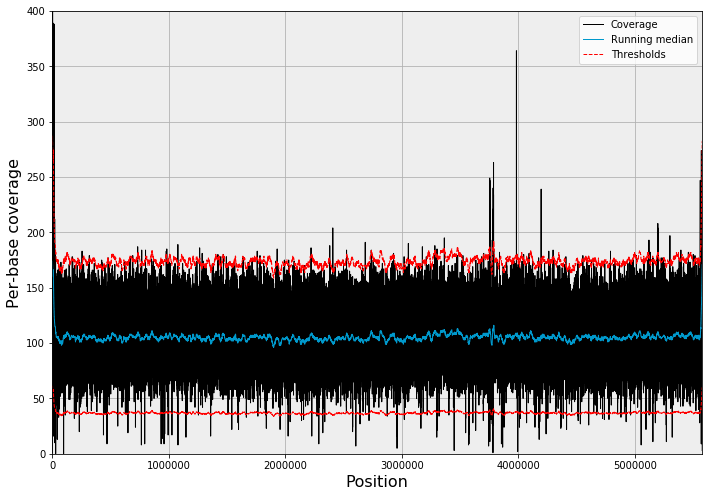

In [25]:
chrom = b.chr_list[0]
chrom.run(20001, circular=True)
chrom.plot_coverage()
_ = ylim([0, 400])

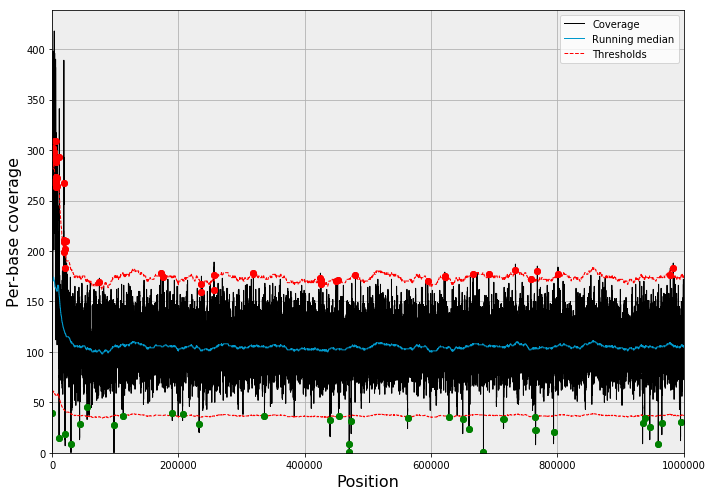

In [26]:
chrom.plot_rois(0,1000000)

Computing 2D histogram. Please wait


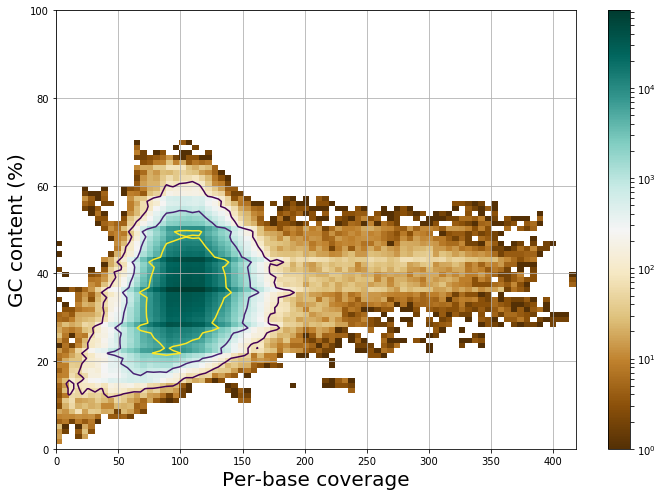

In [27]:
chrom.plot_gc_vs_coverage(bins=[80, 60], Nlevels=6)

# Sequana_coverage analysis (using the standalone)

In [25]:
!sequana_coverage --input S_pombe.filtered.bed --genbank S_pombe.gbk --reference S_pombe.fa

INFO    [sequana]:  Reading S_pombe.filtered.bed. This may take time depending on your input file
INFO    [sequana]:  Scanning input file (chunk of 5000000 rows)
 [-----------------100%-----------------] 2 of 2 complete in 3.1 sec
INFO    [sequana]:  Computing GC content
INFO    [sequana]:  There are 4 chromosomes/contigs.
INFO    [sequana]:      CU329670.1 (starting pos: 0, ending pos: 5579132)
INFO    [sequana]:      CU329671.1 (starting pos: 5579133, ending pos: 10118936)
INFO    [sequana]:      CU329672.1 (starting pos: 10118937, ending pos: 12571819)
INFO    [sequana]:      X54421.1 (starting pos: 12571820, ending pos: 12591250)
INFO    [sequana]:  ==================== analysing chrom/contig 1/4 (CU329670.1)
INFO    [sequana]:  Computing some metrics
INFO    [sequana]:  
Genome length:    5579133
!!!! Information based on a sample of 5000000 points
Sequencing depth (DOC):                     105.29 
Sequencing depth (median):                  105.00 
Breadth of coverage (BOC) (per

The previous cell should create a directory that contains a HTML file called multiqc_report.html, which can be browsed to look at the different chromosome and results.

**Here, all chromosomes are analysed one by one.**